<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/TF2_NN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow module. Check API version.
import tensorflow as tf

print (tf.__version__)


# required for TF to run within docker using GPU (ignore otherwise)

# gpu = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpu[0], True)

2.4.0


In [2]:
# grabing the MNIST dataset (may take time the first time)
print("[INFO] downloading MNIST...")

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scaleing data to normalized 0.0 - 1.0 range
x_train, x_test = x_train / 255.0, x_test / 255.0

[INFO] downloading MNIST...
11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# useing tf.keras sequential API to define simple multiple layer perceptron model
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),   #flattening 28*28 input into 784 * 1
                            tf.keras.layers.Dense(units=128, activation='relu'),    #128 perceptrons for first layer
                            tf.keras.layers.Dense(units=10) ])                        # output with 10 classes


In [4]:
#compling the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.01),                           #Stochastic Gradient Descent
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#printing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0655 - accuracy: 0.7168
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3605 - accuracy: 0.8998
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2972 - accuracy: 0.9171
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2696 - accuracy: 0.9242
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2421 - accuracy: 0.9328
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2268 - accuracy: 0.9375
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2024 - accuracy: 0.9443
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1937 - accuracy: 0.9466
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1825 - accuracy: 0.9502
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.171

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1143 - accuracy: 0.9658


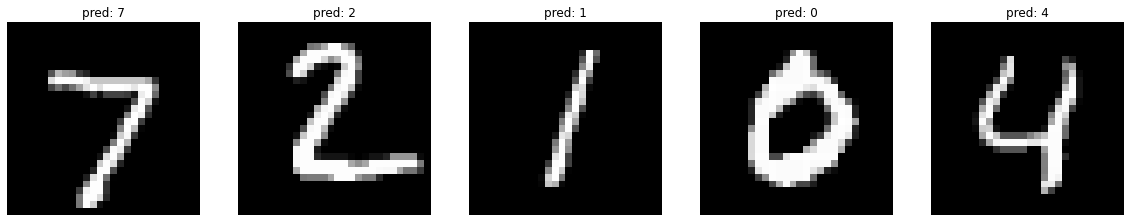

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# seting up matplotlib fig, and size to fit 3x4 pics
nrows = 1
ncols = 5
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# predict images from validation set
n_images = 5
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# visualize image and model prediction
for i in range(n_images):
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="pred: %i" % np.argmax(predictions[i]))
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')

plt.show()

In [10]:
# add softmax layer to extend the model
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax()] )   #here we do not have more training data to use

probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                101770    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
print (model.predict(x_test[5].reshape(1, 28, 28)))   #prints numbers associated with the model

[[-4.5924883   9.158184    0.12222873  1.0143241  -1.5707972  -1.5195698
  -2.7778819   3.719855    1.8253453  -0.5955988 ]]


In [12]:
print (probability_model.predict(x_test[5].reshape(1, 28, 28)))   #prints probability associated with the model because of softmax output

[[1.0611284e-06 9.9450976e-01 1.1839776e-04 2.8891870e-04 2.1780699e-05
  2.2925544e-05 6.5139075e-06 4.3228772e-03 6.5012602e-04 5.7755697e-05]]


In [13]:
print (np.argmax(probability_model.predict(x_test[5].reshape(1, 28, 28))))    #prints argument

1


In [14]:
# use tf.keras Functional API to define simple Multi Layer Perceptron model
x_i = tf.keras.layers.Input(shape=(28,28))
x_1 = tf.keras.layers.Flatten()(x_i)
x_2 = tf.keras.layers.Dense(units=128, activation='relu')(x_1)
x3 = tf.keras.layers.Dense(units=10)(x_2)
x_o = tf.keras.layers.Softmax()(x3)

model2 = tf.keras.Model(inputs=x_i, outputs=x_o)

In [16]:
#compile the model

model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy']
)

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2003 - accuracy: 0.3103
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8045 - accuracy: 0.7608
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7133 - accuracy: 0.7996
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6850 - accuracy: 0.8101
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6712 - accuracy: 0.8157
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6637 - accuracy: 0.8196
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6565 - accuracy: 0.8231
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6535 - accuracy: 0.8243
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6473 - accuracy: 0.8294
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.644

In [22]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 1.5416 - accuracy: 0.9329
